In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
column_headers = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
    "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
    "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
    "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
    "city-mpg", "highway-mpg", "price"
]
# we added the columns headers inorder to use it on our dataset without headers

In [3]:
cars = pd.read_csv('imports-85.csv',names=column_headers)
cars
#read the csv file and then add the headers from the column_headers 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [4]:
cars = cars.replace('?', np.nan) # replace the ? with nulls 

In [5]:
cars.isnull().sum() # get the sum of the null values in the data

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
cars.dropna(inplace=True) #drop the null values

In [9]:
from sklearn.preprocessing import LabelEncoder


categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'num-of-cylinders', 'fuel-system', 'engine-type']



label_encoders = {}

for col in categorical_columns:
    label_encoder = LabelEncoder()
    cars[col] = label_encoder.fit_transform(cars[col])
    label_encoders[col] = label_encoder



cars2 = cars.copy() 

for col, label_encoder in label_encoders.items():
    cars2[col] = label_encoder.inverse_transform(cars[col])

# used the decoder inorder to change the data to numbers


In [10]:
cars2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,0,1,0,0,3,1,0,99.8,...,109,4,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,0,1,0,0,3,0,0,99.4,...,136,4,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,0,1,0,0,3,1,0,105.8,...,136,4,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,0,1,1,0,3,1,0,105.8,...,131,4,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,1,1,0,1,3,2,0,101.2,...,108,4,3.5,2.8,8.8,101,5800,23,29,16430


In [11]:
cars2.isnull().sum() # check the nulls 


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
cars3 = pd.DataFrame(cars2)

# Change the data type of the entire dataset to float
cars3 = cars3.astype(float)

# Print the dataset with float data types
print(cars3)


     symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
3          2.0              164.0   0.0        1.0         0.0           0.0   
4          2.0              164.0   0.0        1.0         0.0           0.0   
6          1.0              158.0   0.0        1.0         0.0           0.0   
8          1.0              158.0   0.0        1.0         1.0           0.0   
10         2.0              192.0   1.0        1.0         0.0           1.0   
..         ...                ...   ...        ...         ...           ...   
200       -1.0               95.0  17.0        1.0         0.0           0.0   
201       -1.0               95.0  17.0        1.0         1.0           0.0   
202       -1.0               95.0  17.0        1.0         0.0           0.0   
203       -1.0               95.0  17.0        0.0         1.0           0.0   
204       -1.0               95.0  17.0        1.0         1.0           0.0   

     body-style  drive-wheels  engine-l

In [13]:
cars3.dtypes

symboling            float64
normalized-losses    float64
make                 float64
fuel-type            float64
aspiration           float64
num-of-doors         float64
body-style           float64
drive-wheels         float64
engine-location      float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type          float64
num-of-cylinders     float64
engine-size          float64
fuel-system          float64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

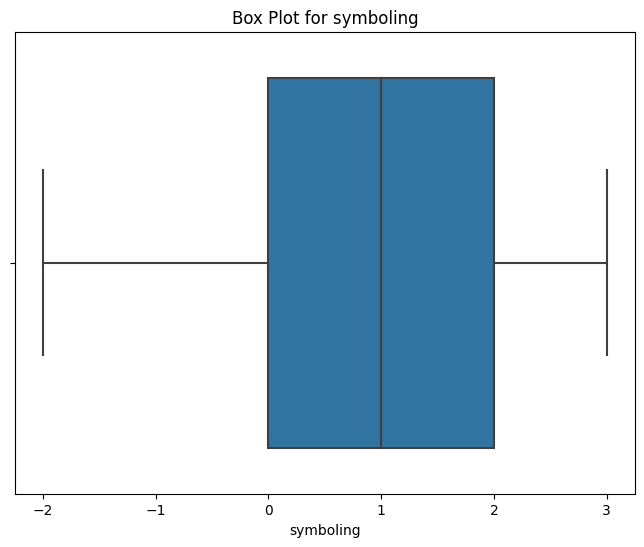

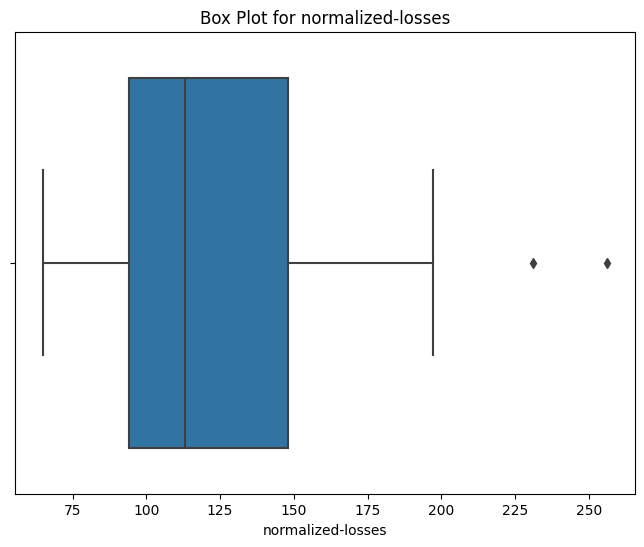

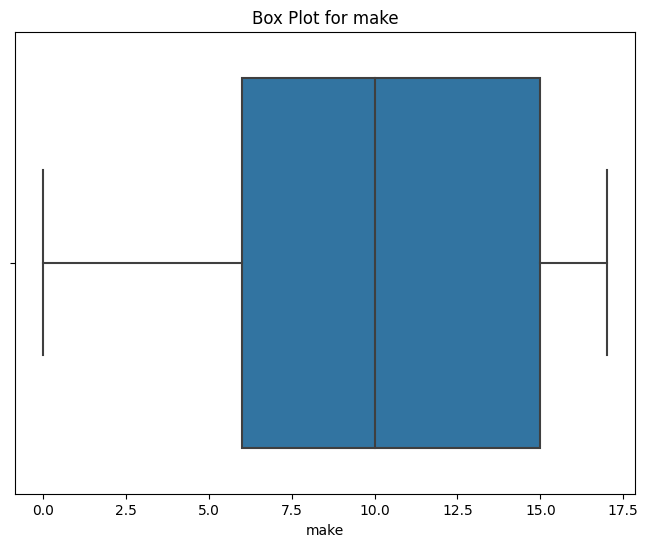

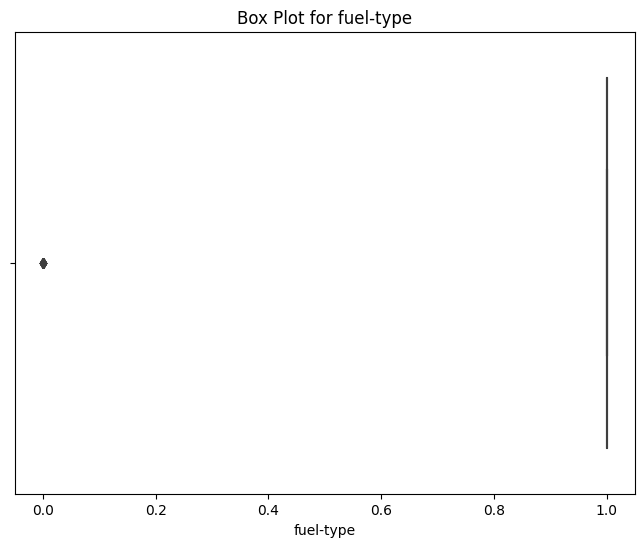

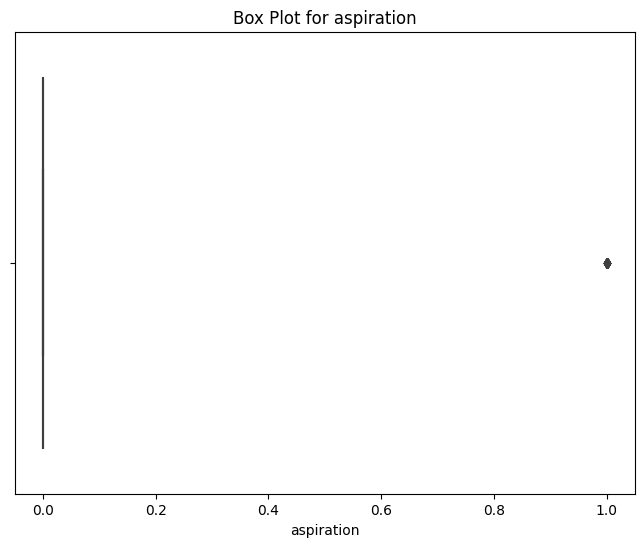

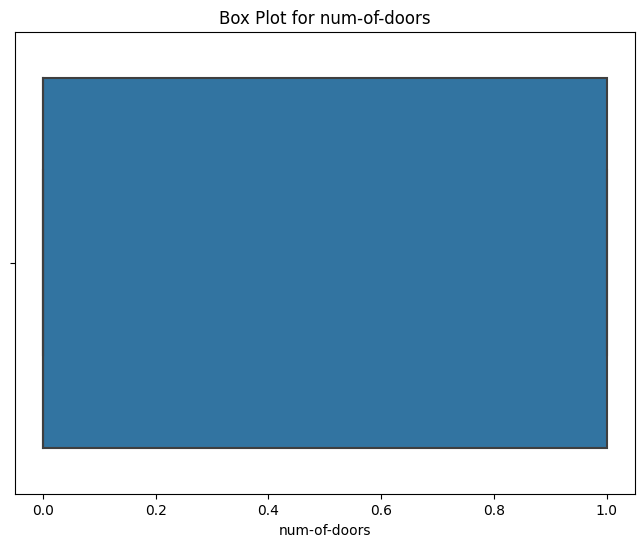

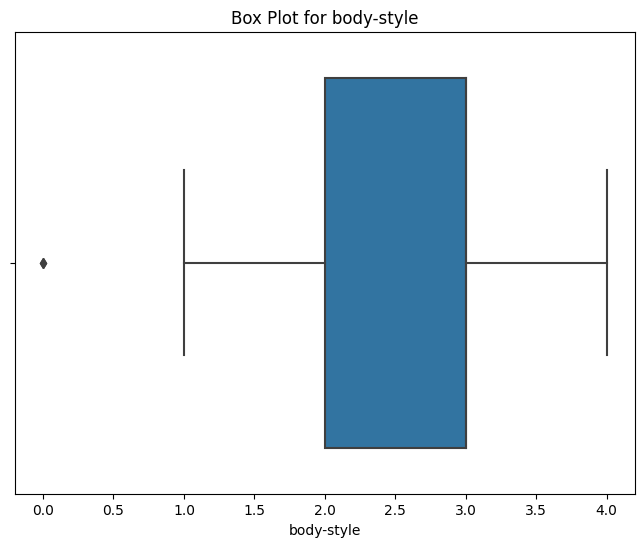

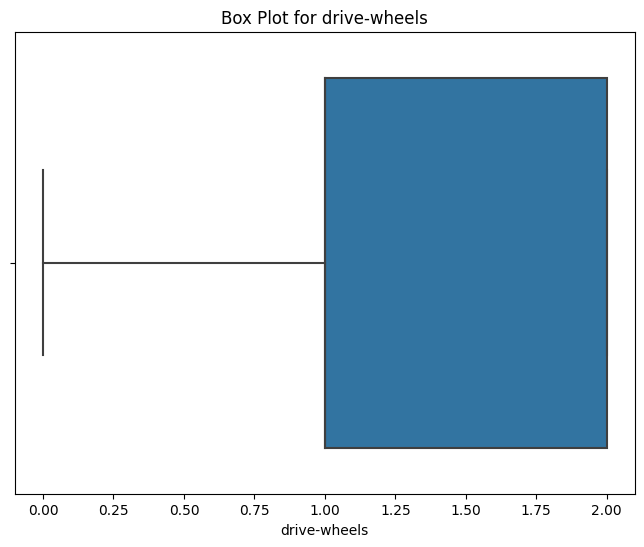

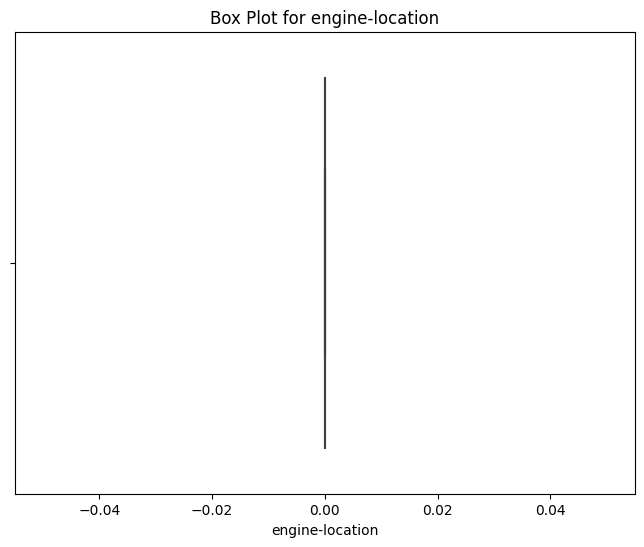

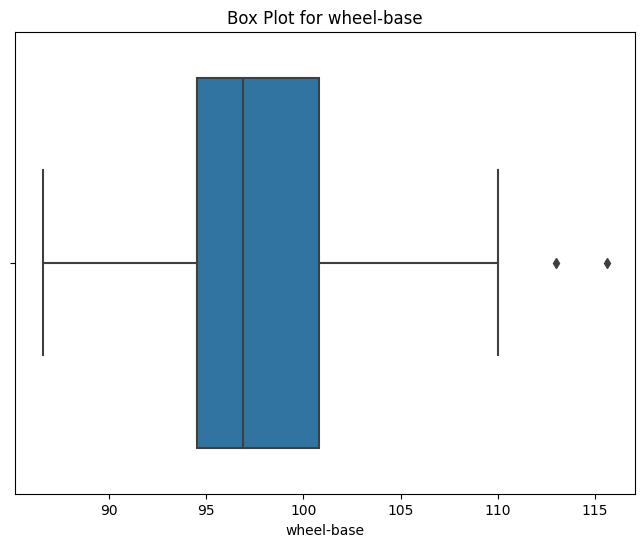

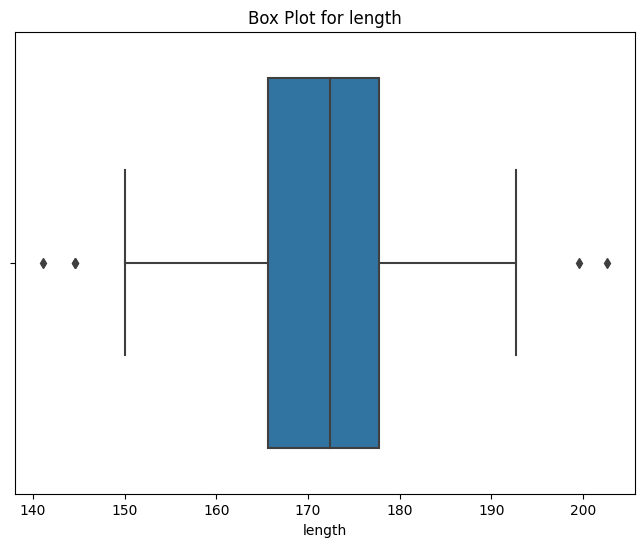

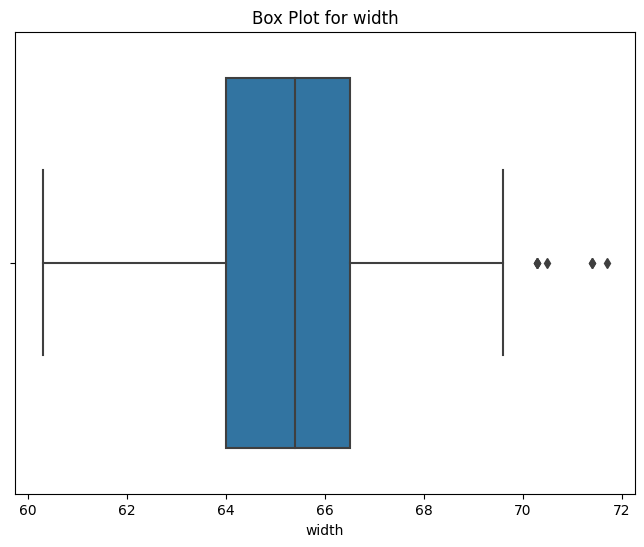

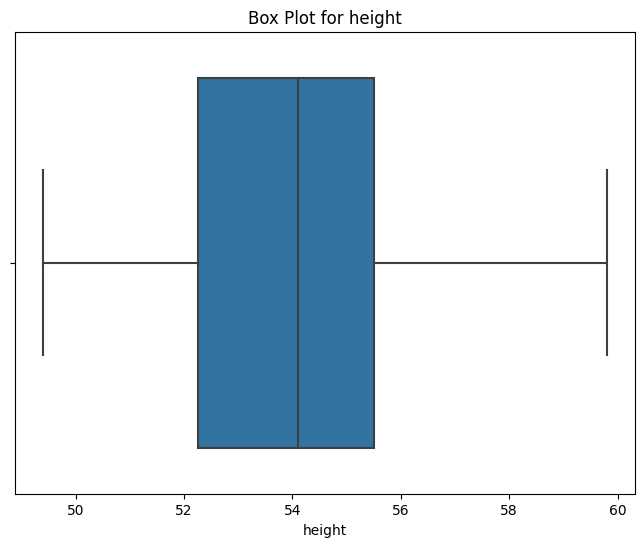

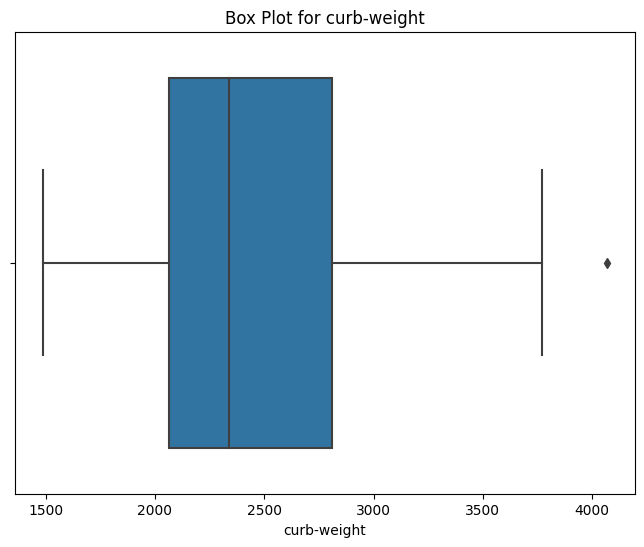

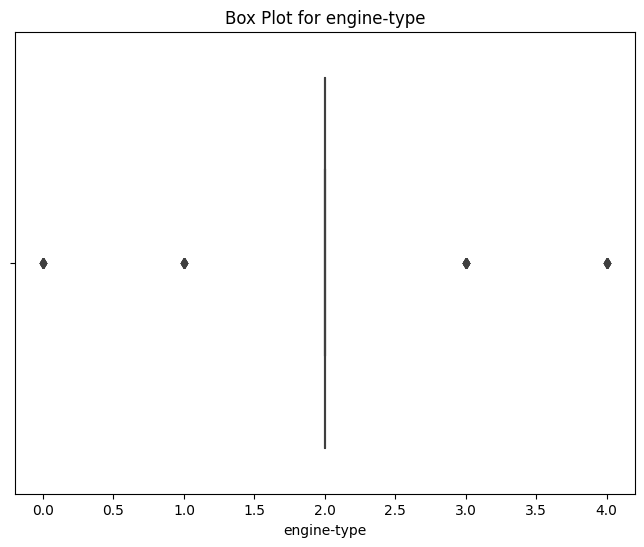

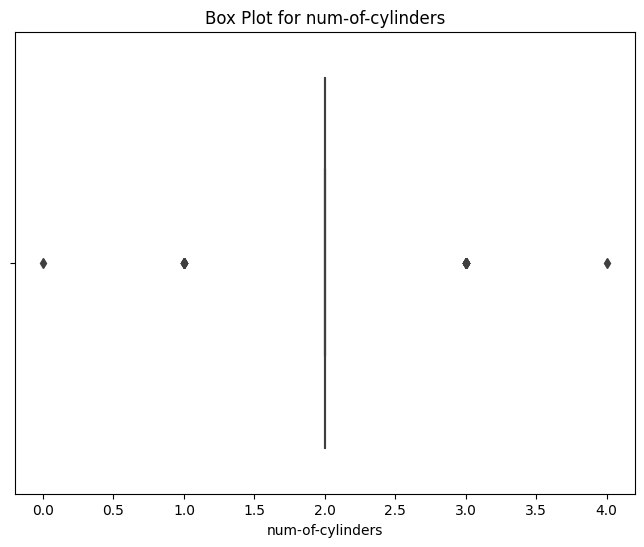

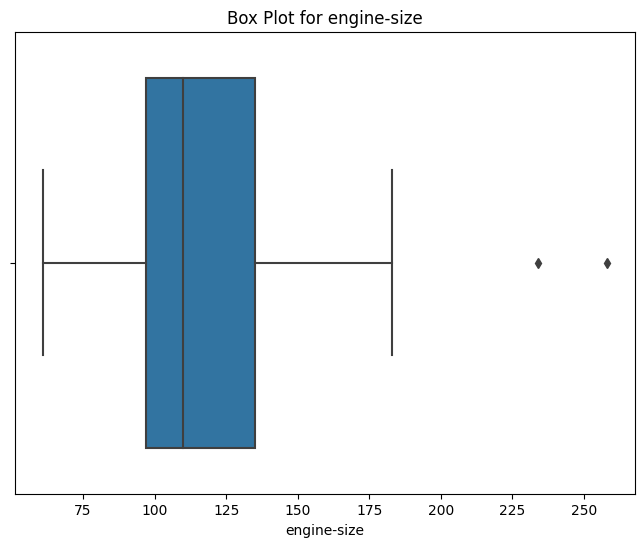

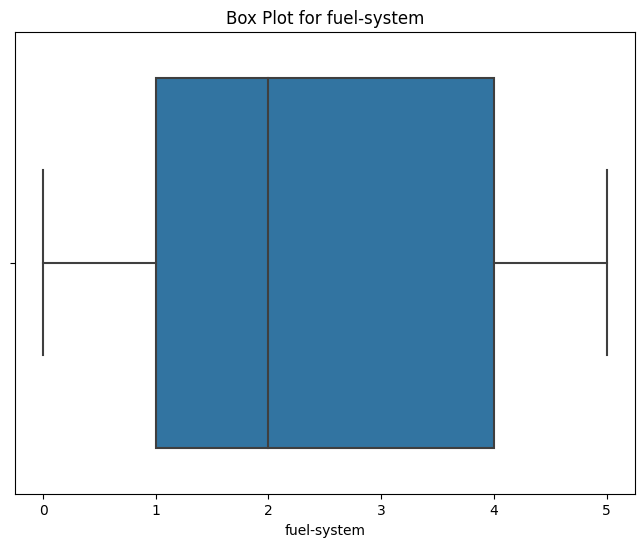

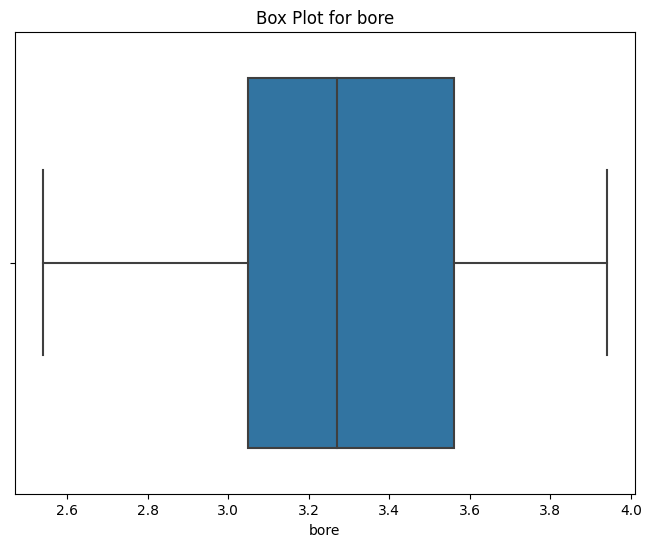

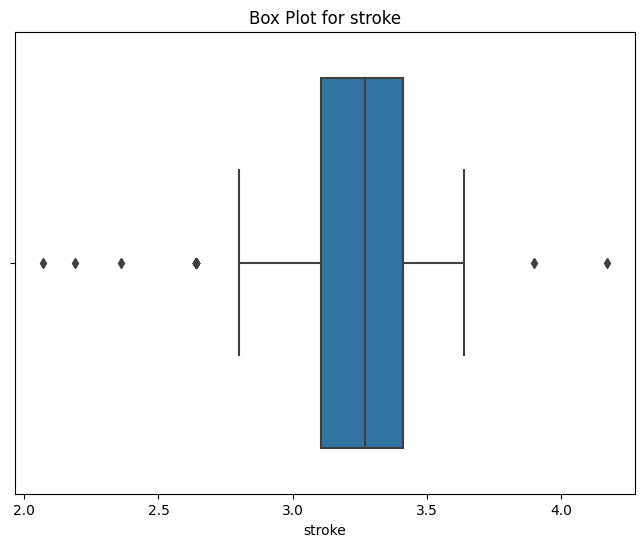

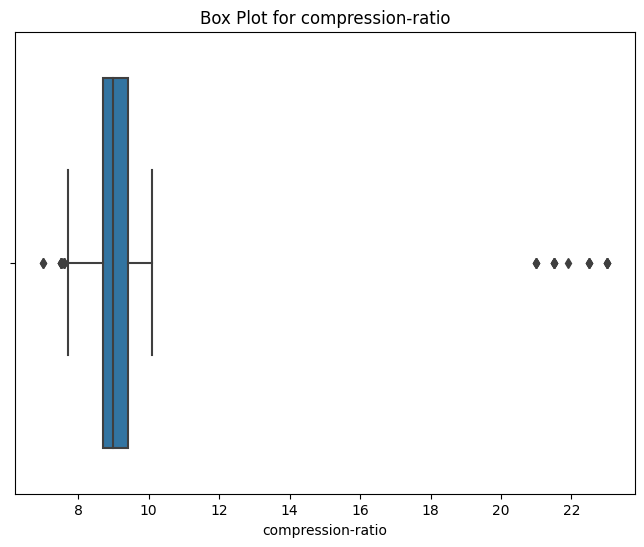

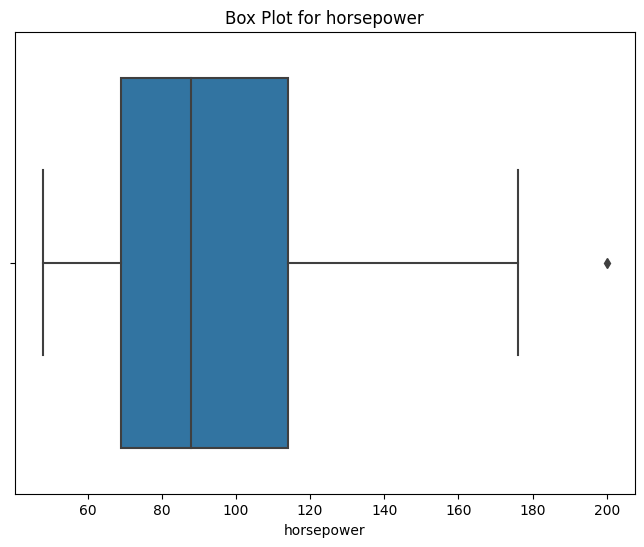

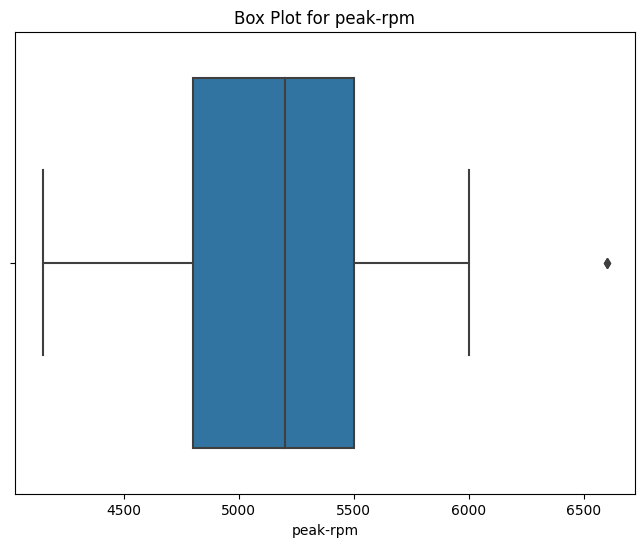

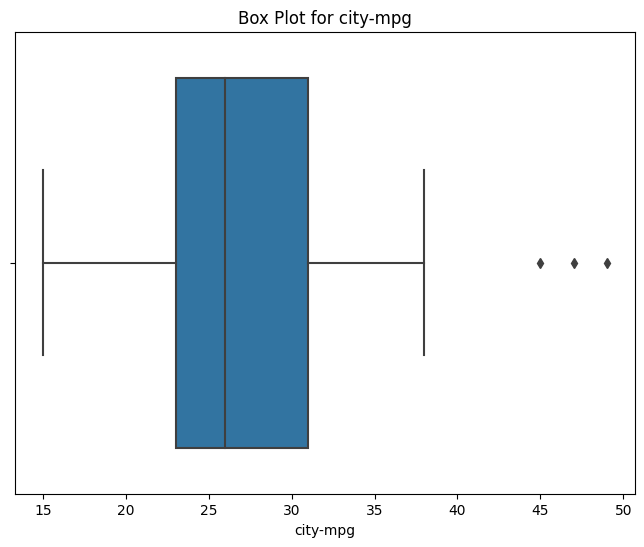

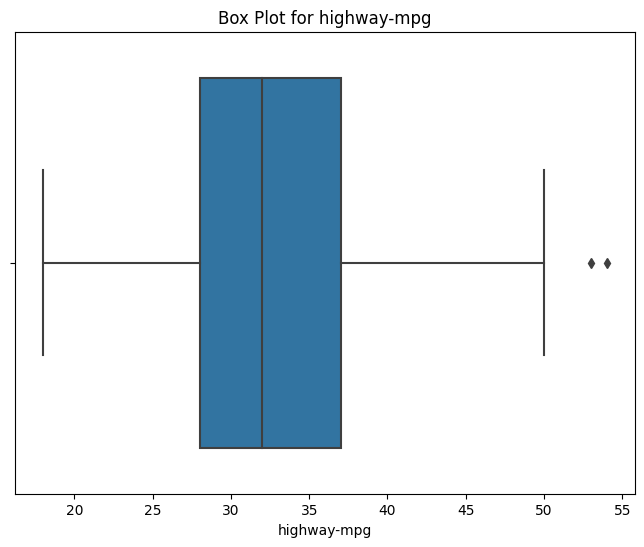

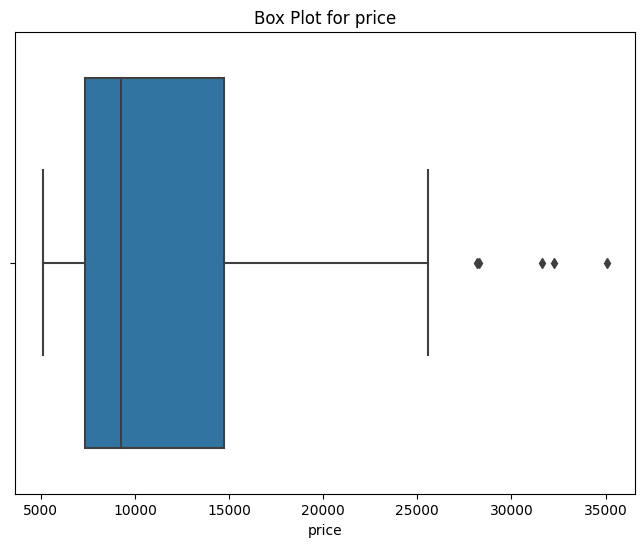

In [14]:
for column in column_headers:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=cars3[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()
    # plotting the outliers for every column

In [15]:
import matplotlib.pyplot as plt

Q1 = cars3.quantile(0.09)
Q3 = cars3.quantile(0.91)
IQR = Q3 - Q1
outliers = ((cars3 < (Q1 - 1.5 * IQR)) | (cars3 > (Q3 + 1.5 * IQR))).any(axis=1)

df_no = cars3[~outliers]
df_no
# remove the outliers using IQR methods

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2.0,164.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,99.8,...,109.0,4.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,99.4,...,136.0,4.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
6,1.0,158.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,105.8,...,136.0,4.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.0
8,1.0,158.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,105.8,...,131.0,4.0,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.0
10,2.0,192.0,1.0,1.0,0.0,1.0,3.0,2.0,0.0,101.2,...,108.0,4.0,3.50,2.80,8.8,101.0,5800.0,23.0,29.0,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95.0,17.0,1.0,0.0,0.0,3.0,2.0,0.0,109.1,...,141.0,4.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,-1.0,95.0,17.0,1.0,1.0,0.0,3.0,2.0,0.0,109.1,...,141.0,4.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,-1.0,95.0,17.0,1.0,0.0,0.0,3.0,2.0,0.0,109.1,...,173.0,4.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,-1.0,95.0,17.0,0.0,1.0,0.0,3.0,2.0,0.0,109.1,...,145.0,2.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [16]:
cars4=df_no

In [17]:
cars4[cars4.duplicated()] # check for duplicates

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [18]:
X_reg = cars4.iloc[:, 1:] 

y_reg = cars4['symboling'] 


X_train0, X_test0, y_train0, y_test0 = train_test_split(X_reg, y_reg, random_state=42)

#the x is the features without the target as the y is the target only then we split the data into training and testing

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train0, y_train0)

# Make predictions
y_train_pred = model.predict(X_train0)
y_test_pred = model.predict(X_test0)

# Calculate RMSE and MAE
train_rmse = np.sqrt(mean_squared_error(y_train0, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test0, y_test_pred))

train_mae = mean_absolute_error(y_train0, y_train_pred)
test_mae = mean_absolute_error(y_test0, y_test_pred)


print("Test RMSE:", test_rmse)

#we used the linear regression model on the training

Test RMSE: 0.7457644652563298


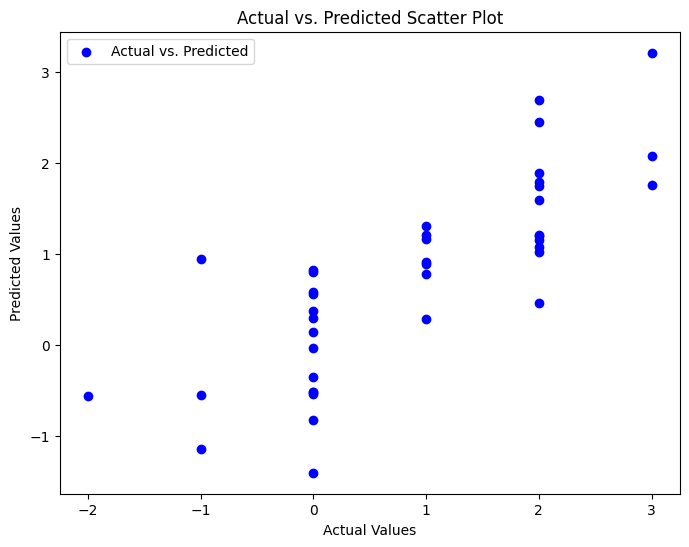

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test0, y_test_pred, c='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Scatter Plot')
plt.legend(loc='upper left')
# scatter plot showing actual vs predicted

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
regressor.fit(X_train0, y_train0)

# Make predictions on the test data
y_pred = regressor.predict(X_test0)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test0, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.725


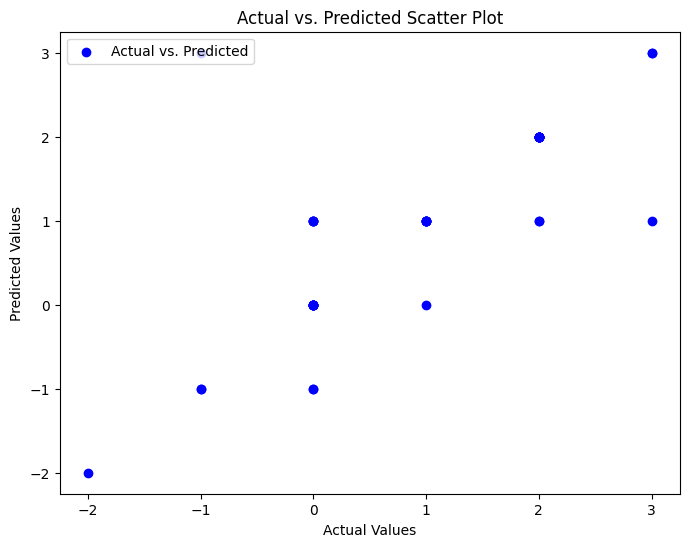

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test0, y_pred, c='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Scatter Plot')
plt.legend(loc='upper left')
plt.show()
# scatter plot showing actual vs predicted

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


# Create a Decision Tree model
decision_tree = DecisionTreeRegressor(max_depth=8, min_samples_split= 8,min_samples_leaf=3,random_state = 42)

# Fit the model to the training data
decision_tree.fit(X_train0, y_train0)

# Make predictions on the test data
y_pred10 = decision_tree.predict(X_test0)

mse = mean_squared_error(y_test0, y_pred10)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.8027777777777778


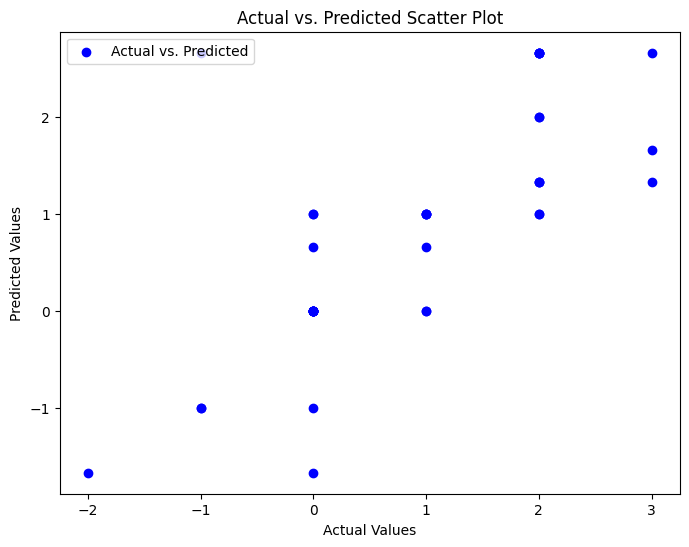

In [24]:


plt.figure(figsize=(8, 6))
plt.scatter(y_test0, y_pred10, c='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Scatter Plot')
plt.legend(loc='upper left')
plt.show()
# scatter plot showing actual vs predicted

In [25]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed

# Fit the model to the training data
random_forest.fit(X_train0, y_train0)

# Make predictions on the test data
y_pred12 = random_forest.predict(X_test0)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test0, y_pred12)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.41828000000000004


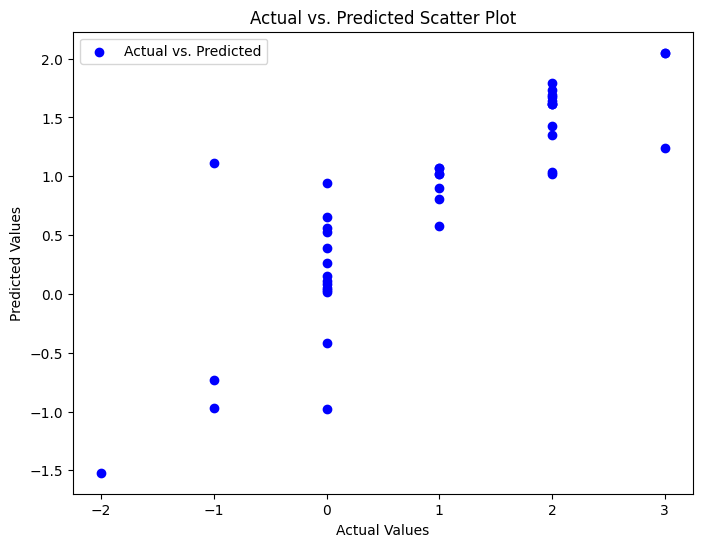

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test0, y_pred12, c='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Scatter Plot')
plt.legend(loc='upper left')
plt.show()
# scatter plot showing actual vs predicted

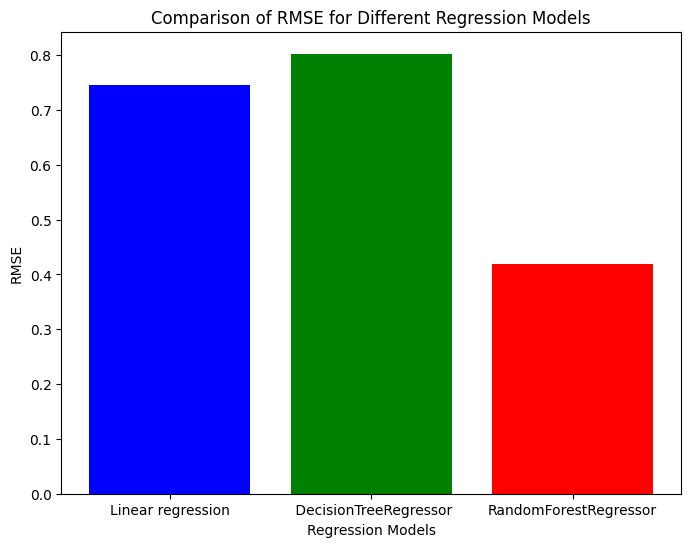

In [28]:

# RMSE values for three different regression models
rmse_values = [0.7457644652563298, 0.8027777777777778, 0.41828000000000004]  # Replace with your actual RMSE values

# Model names or labels for the x-axis
model_names = ["Linear regression", " DecisionTreeRegressor", "RandomForestRegressor"]

# Create a bar chart to compare RMSE values
plt.figure(figsize=(8, 6))
plt.bar(model_names, rmse_values, color=['blue', 'green', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Regression Models')
plt.show()
